# Using Data to Improve MLB Attendance

## DSC 630

## Week 3

## Predictive Analytics Assignment Week 3

## David Berberena

## 6/23/2024

# Program Start

We have been tasked by the LA Dodgers major league baseball team management to take a deeper look into data involving their games and come up with a recommendation of how to increase attendance. The data described many variables that are prevalent in MLB games, and with the data our goal will be to find the most significant factors that impact attendance so that management can take action to address these factors to maximize their attendance. To do this, we must first thoroughly analyze the data. 

In [1]:
# Importing Pandas and Matplotlib here for data manipulation and graphical analysis. 

import pandas as pd
import matplotlib.pyplot as plt

mlb = pd.read_csv('dodgers.csv')

# The head() function is used here to ensure the dataset has loaded properly.

mlb.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


## Initial EDA through Data Visualization

Exploratory data analysis will be the first course of action to glean understanding and insight from the data as to what variables show signs of potential significance to impact the Dodgers game attendance. Initial visualizations of the data will provide us ample information to hypothesize which variables should be looked further at before proceeding to the next step.

In [2]:
# Checking the dataset's shape for feasture selection and eventual training and test set split.

mlb.shape

(81, 12)

In [3]:
# Checking the dataset for the correct dtypes will be shown here by the usage of the dtypes() function.

mlb.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

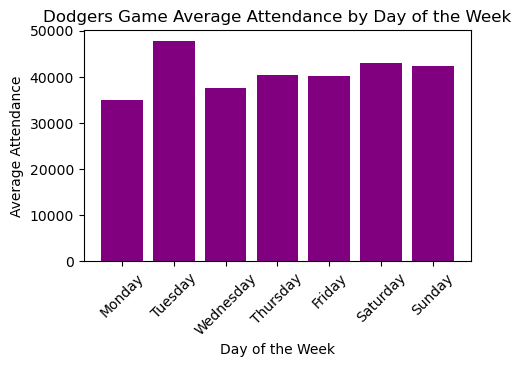

In [29]:
# I will use Matplotlib to create a few visualizations that aid in the EDA process. The first visualization will be a bar 
# chart outlining the average game attendance per day of the week. To do this, I will need to group the dataset by the 
# day_of_week variable and take the mean of each day of the week using the groupby(), mean(), and reset_index() functions.
# Next, I need to explicitly state the order in which the days of the week are and order the dataset accordingly using the 
# pd.Categorical() function. Then I need to sort the observations by the day_of_week variable once again with the 
# sort_values() function. Finally, using the plt.bar() function, I can output the desired chart. I will include the figure()
# function specify the chart size for all charts to decrease the length of the finalized notebook. 

avg_attendance_per_day = mlb.groupby('day_of_week')['attend'].mean().reset_index()

days_in_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_attendance_per_day['day_of_week'] = pd.Categorical(avg_attendance_per_day['day_of_week'], 
                                                       categories = days_in_order, ordered = True)
avg_attendance_per_day = avg_attendance_per_day.sort_values('day_of_week')

plt.figure(figsize = (5,3))
plt.bar(avg_attendance_per_day['day_of_week'], avg_attendance_per_day['attend'], color ='purple')
plt.title('Dodgers Game Average Attendance by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Attendance')
plt.xticks(rotation = 45)
plt.show()

In [5]:
# According to the chart, Tuesday is the day of the week that generates the highest average attendance. This will be noted 
# as a potentially important feature for when I will ultimately convert the categorical variables to numerical variables. 
# The 'day_of_week' variable can be split into seven different numerical variables, so we will be closely observing the 
# importance of the Tuesday variable relating to attendance.

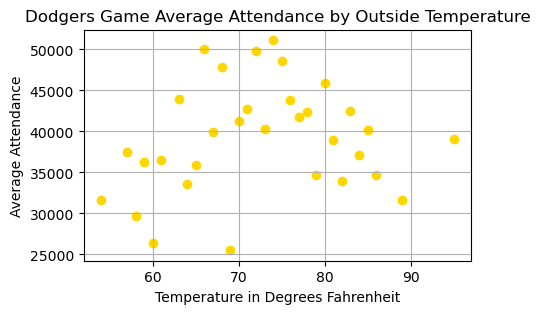

In [30]:
# The next chart I wish to see is the average attendance according to the temperature outside the day the games take place. 
# I will visualize this information through the construction of a scatter chart. I will group the dataset by temperature and
# take the mean attendance in the same fashion as the previous chart's creation. Using Matplotlib's scatter() function, I 
# can now craft the chart. I added the grid() function for increased readability. 

avg_attendance_by_temp = mlb.groupby('temp')['attend'].mean().reset_index()

plt.figure(figsize = (5,3))
plt.scatter(avg_attendance_by_temp['temp'], avg_attendance_by_temp['attend'], color = 'gold')
plt.title('Dodgers Game Average Attendance by Outside Temperature')
plt.xlabel('Temperature in Degrees Fahrenheit')
plt.ylabel('Average Attendance')
plt.grid(True)
plt.show()

In [7]:
# The scatter chart has revealed that games held with an outside temperature between 70 and 80 degrees have the highest 
# attendance. As the 'temp' variable is already a numerical variable, we can observe if it is impactful to the attendance 
# variable. 

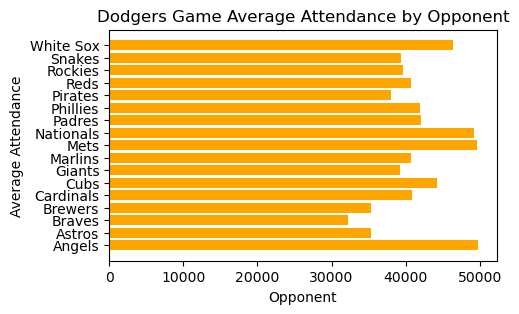

In [31]:
# Now, I will craft a horizontal bar chart showcasing the average attendance for each Dodgers opponent. I will craft the 
# chart in the same manner as the first bar chart. yet I have chosen a horizontal chart to discern the height of the bars 
# with more certainty.

avg_attendance_by_opponent = mlb.groupby('opponent')['attend'].mean().reset_index()

plt.figure(figsize = (5,3))
plt.barh(avg_attendance_by_opponent['opponent'], avg_attendance_by_opponent['attend'], color ='orange')
plt.title('Dodgers Game Average Attendance by Opponent')
plt.xlabel('Opponent')
plt.ylabel('Average Attendance')
plt.show()

In [9]:
# This bar chart shows the Angels and Mets as the frontrunners for the opponents that generate the most attendance, followed
# closely by the Nationals. I will look for these team variables when I convert the 'opponent' variable to numerical ones. 
# As it stands now, we have found quite a few potentially significant variables that could impact attendance. I will 
# continue wut the remaining visualizations.

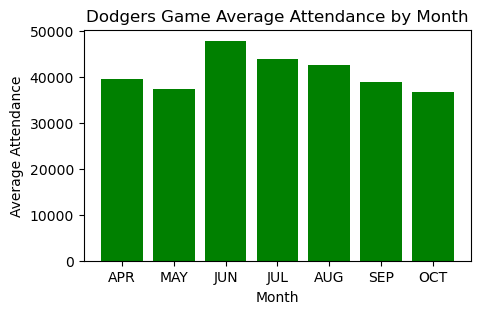

In [32]:
# As the dataset is broken up into observations by month, I will also create a bar chart to understand the comparison 
# between average attendance for each month listed. The same technique to craft the first bar chart will be employed here as
# the months may not be in order, so they must be ordered for a clearer understanding.

avg_attendance_by_month = mlb.groupby('month')['attend'].mean().reset_index()

months_in_order = ['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT']
avg_attendance_by_month['month'] = pd.Categorical(avg_attendance_by_month['month'], 
                                                       categories = months_in_order, ordered = True)

avg_attendance_by_month = avg_attendance_by_month.sort_values('month')

plt.figure(figsize = (5,3))
plt.bar(avg_attendance_by_month['month'], avg_attendance_by_month['attend'], color = 'green')
plt.title('Dodgers Game Average Attendance by Month')
plt.xlabel('Month')
plt.ylabel('Average Attendance')
plt.show()

In [11]:
# Here we can see that the month of June has garnered the most attendance on average. Outside research has enlightened me 
# that the month of June is midseason for baseball, which means that the MLB first-year draft happens during this month. 
# Even though the draft currently takes place during the month of July since 2021, we have no way of knowing from what year 
# this data originated from. This means that we can only assume that this data might have been taken from a time before 
# then, but it is still a variable to take note of. 

# The final two visuals I wish to create will be based on domain knowledge that I acquired by asking a coworker who attended
# multiple baseball games growing up as a child.

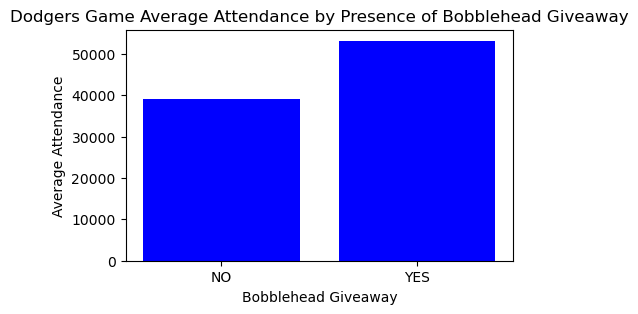

In [33]:
# When I alerted my coworker as to the nature of this assignment, she automatically remembered that her favorite item that 
# was sold during the baseball games she went to was a bobblehead figure. She explained that there are bobblehead figures of
# various baseball players and that they are known because of their collectible nature. Certain games that she went to, she
# remembered that they gave a limited edition bobblehead figure away as a special promotion to entice more people to come. 
# Since this variable stood out so much in her mind, I will see what the data here reflects on the presence of a bobblehead 
# figure giveaway promotion at the games as it relates to attendance.

avg_attendance_by_bobblehead = mlb.groupby('bobblehead')['attend'].mean().reset_index()

plt.figure(figsize = (5,3))
plt.bar(avg_attendance_by_bobblehead['bobblehead'], avg_attendance_by_bobblehead['attend'], color = 'blue')
plt.title('Dodgers Game Average Attendance by Presence of Bobblehead Giveaway')
plt.xlabel('Bobblehead Giveaway')
plt.ylabel('Average Attendance')
plt.show()

In [13]:
# It is interesting to see the data confirms what my coworker explained to me, showing that domain knowledge can indeed 
# play a part in datas science. With an over 10,000 person difference in average attendance due to the presence of a 
# bobblehead promotional giveaway, this variable is another feature to look at during the categorical to numerical variable
# conversion.

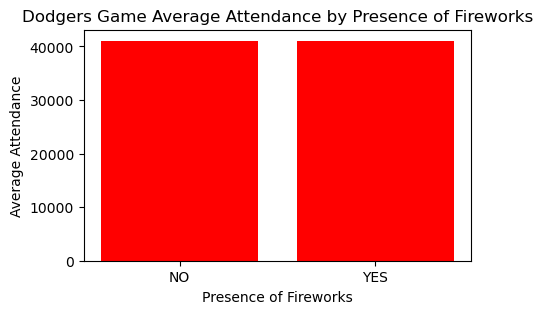

In [34]:
# The last visualization I am interested to see is the how the average attendance is affected by the presence of fireworks.
# My coworker explained that a lot of people came to see the fireworks and that they usually took place from Tuesday to 
# Friday. This also explains why Tuesday looks to be a day where more people come to the games, which is more reassurance 
# that the data lines up with actual experience. I will create a bar chart in the same fashion as the previous one.

avg_attendance_by_fireworks = mlb.groupby('fireworks')['attend'].mean().reset_index()

plt.figure(figsize = (5,3))
plt.bar(avg_attendance_by_fireworks['fireworks'], avg_attendance_by_fireworks['attend'], color = 'red')
plt.title('Dodgers Game Average Attendance by Presence of Fireworks')
plt.xlabel('Presence of Fireworks')
plt.ylabel('Average Attendance')
plt.show()

In [15]:
# The implications of this chart are surprising, as the chart shows that the average attendance of games that do not have 
# fireworks is almost exactly the same as the average attendance of games that do have fireworks.

## Model Selection and Creation

With the variables we have now found to be potentially significant, we can move forward with choosing the model we will create that will confidently verify whether these notable variables are actually significant. Another course of action to take with this data is to examine correlation, as calculating this statistic and seeing any new variables that are highly linearly reated to the attendance variable can show more potentially significant features. 

In [24]:
# I wish to create a correlation matrix to determine the most positively correlated factors relating to attendance, which 
# is defined by the 'attend' variable. Now while correlation does not imply causation, highly correlated variables give 
# an indicator of what variables may potentially turn out to be significant. To craft the correlation matrix, I will first 
# convert the categorical variables to dummy numerical variables using pd.get_dummies().

dummy_mlb = pd.get_dummies(mlb)

# Now I can craft the correlation matrix using the corr() function on the dummy dataset.

corr_matrix = dummy_mlb.corr()

corr_matrix

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
day,1.000000,0.027093,-0.127612,0.136045,-0.030087,-0.107865,0.106079,1.603758e-01,-0.290405,-0.122427,...,0.039828,-0.039828,0.202274,-0.202274,0.030182,-0.030182,-0.099528,0.099528,-0.145363,0.145363
attend,0.027093,1.000000,0.098951,-0.073237,0.098944,0.143837,0.295853,-2.394707e-01,-0.103132,-0.105443,...,0.043544,-0.043544,0.055002,-0.055002,-0.133269,0.133269,-0.002094,0.002094,-0.581895,0.581895
temp,-0.127612,0.098951,1.000000,-0.511997,0.241381,0.000934,-0.110893,-2.969875e-01,0.249564,0.560113,...,0.272141,-0.272141,-0.064521,0.064521,-0.004394,0.004394,0.189899,-0.189899,-0.049573,0.049573
month_APR,0.136045,-0.073237,-0.511997,1.000000,-0.198811,-0.173913,-0.147442,-2.229113e-01,-0.081786,-0.173913,...,0.069584,-0.069584,0.066354,-0.066354,-0.102233,0.102233,0.006808,-0.006808,0.063872,-0.063872
month_AUG,-0.030087,0.098944,0.241381,-0.198811,1.000000,-0.198811,-0.168550,-2.548236e-01,-0.093495,-0.198811,...,0.018182,-0.018182,-0.128951,0.128951,0.093495,-0.093495,-0.034245,0.034245,-0.089337,0.089337
month_JUL,-0.107865,0.143837,0.000934,-0.173913,-0.198811,1.000000,-0.147442,-2.229113e-01,-0.081786,-0.173913,...,-0.019881,0.019881,-0.157591,0.157591,0.081786,-0.081786,0.006808,-0.006808,-0.139015,0.139015
month_JUN,0.106079,0.295853,-0.110893,-0.147442,-0.168550,-0.147442,1.000000,-1.889822e-01,-0.069338,-0.147442,...,0.033710,-0.033710,0.056254,-0.056254,-0.138675,0.138675,-0.046176,0.046176,-0.089188,0.089188
month_MAY,0.160376,-0.239471,-0.296987,-0.222911,-0.254824,-0.222911,-0.188982,1.000000e+00,-0.104828,-0.222911,...,-0.101929,0.101929,0.085049,-0.085049,0.104828,-0.104828,0.008726,-0.008726,0.038526,-0.038526
month_OCT,-0.290405,-0.103132,0.249564,-0.081786,-0.093495,-0.081786,-0.069338,-1.048285e-01,1.000000,-0.081786,...,-0.093495,0.093495,0.031204,-0.031204,0.038462,-0.038462,0.089648,-0.089648,0.077743,-0.077743
month_SEP,-0.122427,-0.105443,0.560113,-0.173913,-0.198811,-0.173913,-0.147442,-2.229113e-01,-0.081786,1.000000,...,0.069584,-0.069584,0.066354,-0.066354,-0.102233,0.102233,0.006808,-0.006808,0.165315,-0.165315


In [ ]:
# Looking at the correlation matrix coefficient values for the 'attend' variable, the only variable out of the ones
# visualized above that shares any notable positive correlation is the 'bobblehead' variable, with a +/-0.58 rating for YES
# and NO, respectively. The next positively correlated are the 'day_of_week_Tuesday' and 'month_JUN' predictors, yet their 
# coefficient values are only 0.35 and 0.29, showing only a weak positive correlation. Keeping these observations in mind, I
# can now move onto the splitting of the dataset into the training and test sets.

In [25]:
# I will now  craft the training and test sets. These sets will be made for the creation of a linear regression model, as 
# this model is straightforward in helping to answer the question of which factors are the most significant in improving 
# game attendance for the Dodgers. However, as the intention of the model is to understand the impact of these features on 
# the 'attend' variable, I will use the OLS (ordinary least squares) method of linear regression. To craft the two sets, 
# I will import the train_test_split() function found in Sci-kitlearn.

from sklearn.model_selection import train_test_split
import numpy as np

# To create the predictors dataset and the outcome dataset, I will create the two variables using the drop() function. 

x = dummy_mlb.drop(['attend'], axis = 1)
y = dummy_mlb['attend']

# To make sure that Python registers every value within both datasets as numerical data, I will use the apply() function to
# allow the pd.to_numeric() function to work on them.

x = x.apply(pd.to_numeric, errors = 'coerce')
y = pd.to_numeric(y, errors = 'coerce')

# I must also make sure that the data types of the features are recognized as integers or floats. Since the current types 
# boolean as they were converted from categorical variables, I can convert the data types to integers using the astype() 
# function and a for loop calling each column with the boolean data type.

x = x.astype({col: 'int' for col in x.select_dtypes(include = 'bool').columns})

# The splitting of the datasets can now occur with the sets being cut at a 80/20 ratio.

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

# I will call each variable's shape to see if the split was made successfully.

print('The shape of the predictor variable training set is:', xtrain.shape)
print('The shape of the predictor variable test set is:', xtest.shape)
print('The shape of the outcome variable training set is:', ytrain.shape)
print('The shape of the outcome variable test set is:', ytest.shape)

The shape of the predictor variable training set is: (64, 45)
The shape of the predictor variable test set is: (17, 45)
The shape of the outcome variable training set is: (64,)
The shape of the outcome variable test set is: (17,)


In [26]:
# Here I need to import the statsmodels library to have access to the OLS() function to craft the ordinary least squares 
# linear regression model. 

import statsmodels.api as sm

# To generate the intercept metric that is part of the ordinary least squares model, I need to include a constant that 
# follows the predictor variable training set. This can be done with the sm.add_constant() function.

xtrain_constant = sm.add_constant(xtrain)

# Now the model will be fitted here using the OLS() function.

mlb_model = sm.OLS(ytrain, xtrain_constant).fit()

# To visualize the results of the OLS model, I can use the summary() function and print it. I have printed the results and
# commented them out here.

# OLS Regression Results                            
# ==============================================================================
# Dep. Variable:                 attend   R-squared:                       0.854
# Model:                            OLS   Adj. R-squared:                  0.658
# Method:                 Least Squares   F-statistic:                     4.372
# Date:                Sat, 22 Jun 2024   Prob (F-statistic):           8.21e-05
# Time:                        11:57:50   Log-Likelihood:                -607.49
# No. Observations:                  64   AIC:                             1289.
# Df Residuals:                      27   BIC:                             1369.
# Df Model:                          36                                         
# Covariance Type:            nonrobust                                         
# =========================================================================================
#                             coef    std err          t      P>|t|      [0.025      0.975]
# -----------------------------------------------------------------------------------------
# const                   449.3355   5503.386      0.082      0.936   -1.08e+04    1.17e+04
# day                      90.2178    153.921      0.586      0.563    -225.602     406.038
# temp                    663.3305    304.636      2.177      0.038      38.270    1288.391
# month_APR              1.277e+04   6460.534      1.976      0.058    -487.711     2.6e+04
# month_AUG              2436.9685   3821.467      0.638      0.529   -5404.033    1.03e+04
# month_JUL              3221.8705   2901.603      1.110      0.277   -2731.727    9175.468
# month_JUN             -9241.1696   8976.772     -1.029      0.312   -2.77e+04    9177.646
# month_MAY              4468.5848   3285.352      1.360      0.185   -2272.401    1.12e+04
# month_OCT             -8246.9390   6687.659     -1.233      0.228    -2.2e+04    5475.003
# month_SEP             -4958.1890   4249.204     -1.167      0.253   -1.37e+04    3760.457
# day_of_week_Friday    -1.448e+04   6583.133     -2.200      0.037    -2.8e+04    -976.447
# day_of_week_Monday    -1927.8671   2835.097     -0.680      0.502   -7745.005    3889.271
# day_of_week_Saturday   6304.5832   2565.238      2.458      0.021    1041.149    1.16e+04
# day_of_week_Sunday    -2772.4244   4035.877     -0.687      0.498   -1.11e+04    5508.510
# day_of_week_Thursday   4105.1301   3233.605      1.270      0.215   -2529.679    1.07e+04
# day_of_week_Tuesday    1.209e+04   2794.984      4.326      0.000    6356.966    1.78e+04
# day_of_week_Wednesday -2867.9663   2665.678     -1.076      0.291   -8337.485    2601.552
# opponent_Angels        2.048e+04   9637.284      2.125      0.043     707.147    4.03e+04
# opponent_Astros       -2920.0792   5769.709     -0.506      0.617   -1.48e+04    8918.387
# opponent_Braves       -1.236e+04   6497.001     -1.902      0.068   -2.57e+04     975.358
# opponent_Brewers      -7493.2417   6503.478     -1.152      0.259   -2.08e+04    5850.793
# opponent_Cardinals     -236.7254   3924.190     -0.060      0.952   -8288.497    7815.047
# opponent_Cubs          1760.8378   5569.234      0.316      0.754   -9666.287    1.32e+04
# opponent_Cubs          1760.8378   5569.234      0.316      0.754   -9666.287    1.32e+04
# opponent_Giants         384.3207   4244.372      0.091      0.929   -8324.411    9093.052
# opponent_Marlins      -3224.0426   5635.404     -0.572      0.572   -1.48e+04    8338.852
# opponent_Mets           1.33e+04   7163.305      1.857      0.074   -1397.317     2.8e+04
# opponent_Nationals    -7223.5827   7445.916     -0.970      0.341   -2.25e+04    8054.174
# opponent_Padres        -715.0369   3187.354     -0.224      0.824   -7254.947    5824.873
# opponent_Phillies      -104.2026   4486.319     -0.023      0.982   -9309.370    9100.965
# opponent_Pirates      -6943.2418   5818.537     -1.193      0.243   -1.89e+04    4995.410
# opponent_Reds          -185.9194   6061.650     -0.031      0.976   -1.26e+04    1.23e+04
# opponent_Rockies      -6337.5473   3592.761     -1.764      0.089   -1.37e+04    1034.189
# opponent_Snakes       -5595.7640   3355.954     -1.667      0.107   -1.25e+04    1290.084
# opponent_White Sox     1.786e+04   9441.262      1.891      0.069   -1514.714    3.72e+04
# skies_Clear             698.8721   2809.073      0.249      0.805   -5064.870    6462.614
# skies_Cloudy           -249.5366   3105.928     -0.080      0.937   -6622.374    6123.301
# day_night_Day           790.9559   4102.654      0.193      0.849   -7626.995    9208.907
# day_night_Night        -341.6204   2530.366     -0.135      0.894   -5533.502    4850.262
# cap_NO                 1395.5797   3887.083      0.359      0.722   -6580.055    9371.215
# cap_YES                -946.2441   4566.386     -0.207      0.837   -1.03e+04    8423.205
# shirt_NO              -3463.0082   3624.501     -0.955      0.348   -1.09e+04    3973.854
# shirt_YES              3912.3438   3886.941      1.007      0.323   -4063.000    1.19e+04
# fireworks_NO          -9693.6640   4364.840     -2.221      0.035   -1.86e+04    -737.753
# fireworks_YES          1.014e+04   4949.289      2.049      0.050     -12.103    2.03e+04
# bobblehead_NO         -2274.1479   2819.840     -0.806      0.427   -8059.981    3511.685
# bobblehead_YES         2723.4835   3572.223      0.762      0.452   -4606.113    1.01e+04
# ==============================================================================
# Omnibus:                        4.101   Durbin-Watson:                   2.374
# Prob(Omnibus):                  0.129   Jarque-Bera (JB):                3.178
# Skew:                           0.490   Prob(JB):                        0.204
# Kurtosis:                       3.479   Cond. No.                     3.17e+16
# ==============================================================================


## Results Analysis

With the model fitted and the results in hand, we can now analyze our findings and verify if any of the previously notated features have been confirmed as significant and if any other features that were overlooked in the EDA stage have made themselves known. From there, we can make our final recommendation to LA Dodgers management so they may attempt to maximize their game attendance.

In [23]:
# The results of the OLS model outline a few major confirmations and interesting statistics. Relating to the model as a 
# whole, the R-squared equals 0.85, showing that the model is a good fit for the data. Adjusting for the predictions of the 
# model, the adjusted R-squared value is 0.65, indicating that the model still explains a large amount of variance within
# the data. The prob (F-statistic) is very close to zero, highlighting the model's significance to the hypothesis of factors
# being present that significantly affect attendance. 

# Moving down to the features list of the OLS model summary, as there are many features to look at and compare statistics, I
# wish to extract the significant features impacting attendance. It is widely accepted that a feature's p-value is the 
# statistic that best defines significance by being less than or equal to 0.05. I will use the pvalues attrbute of the model
# and indexing to print the names of the most significant features aling with their p-values.

model_p_values = mlb_model.pvalues

significant_features = model_p_values[model_p_values <= 0.05]

print("The most significant features with a p-value of 0.05 or less are:")
print(significant_features)

The most significant features with a p-value of 0.05 or less are:
temp                    0.038358
day_of_week_Friday      0.036535
day_of_week_Saturday    0.020690
day_of_week_Tuesday     0.000186
opponent_Angels         0.042868
fireworks_NO            0.034941
dtype: float64


In [24]:
# Out of the six features considered to be significant to the attendance variable, three of them have been confirmed as 
# accurate from the EDA and visualization stage of our Dodgers data analysis. The temperature, Tuesday, and Angels variables
# were deemed notable when looking at our created charts, and each of them have a p-value less than 0.05. 
# The day_of_week_Tuesday is actually the most significant variable of all significant features that have been identified by
# the OLS model, as its p-value is almost zero. The three new features that have become apparent are the Friday, Saturday, 
# and no fireworks variables. Now that we have identified these significant variables, we can now identify which of these 
# positively impact attendance according to the model's results. Let's break each feature down by its other metrics.

# temp: positive coefficient and confidence intervals indicates a good positive relationship with the attendance variable

# day_of_week_Friday: negative coefficient and confidence intervals shows a strong negative relationship with attendance 

# day_of_week_Saturday: positive coefficient and confidence intervals indicates a good positive relationship with attendance

# day_of_week_Tuesday: positive coefficient and confidence intervals indicates a good positive relationship with attendance

# opponent_Angels: positive coefficient and confidence intervals indicates a good positive relationship with attendance

# fireworks_NO: negative coefficient and confidence intervals shows a strong negative relationship with attendance

# With this detailed outline of each each significant feature's affect on attendance, we are now able to make our final 
# recommendation to management.

## Final Recommendation

Taking all of our data analysis results and visualizations into consideration, the data provided of the LA Dodgers games has allowed us to see that to increase attendance, management must focus on the following variables:

1. They must try to have their games scheduled on Tuesdays, as this is the most significant day of the week for them to play. If a Tuesday is not possible for whatever extenuating circumstance. Saturday is the second choice for Dodgers to play a game.

2. Management should keep a track of the weather and try to schedule games to play when the temperature is forecasted to be between 70 and 80 degrees Fahrenheit. The next best range of temperatures (should the weather not cooperate) would be between 60 and 70 degrees Fahrenheit.

3. It is best that the LA Dodgers play against the Angels, as this match-up draws an increased number of attendees.

While it may be improbable to perform each of these recommendations at the same time, management is now notified as to what affects their attendance, and how they can focus on specific factors to increase game turnout.